

#  Projeto ADC
## Grupo 02




Top 3 Conjutos de Dados com maior relação Nós-Arestas:
* Artistas
* Companhias
* Novos sites e Atletas

| category | nodes | edges | Nº médio de edges por node |
| ----- | ----- | ----- | ----- |
| Government | 7,057 | 89,455 | 12,67 |
| New Sites | 27,917 | 206,259 | 7,38 |
| Athletes | 13,866 | 86,858 | 6.26 |
| Public Figures | 11,565 | 67,114 | 5.80 |
| TV Shows | 3,892 | 17,262 | 4.43 |
| Politician | 5,908 | 41,729 | 7.06 |
| Artist | 50,515 | 819,306 | 16.22 |
| Company | 14,113 | 52,310 | 3.70 |

Foco em:

| category | nodes | edges | Nº médio de edges por node |
| ----- | ----- | ----- | ----- |
| Artist | 50,515 | 819,306 | 16.22 |
| Government | 7,057 | 89,455 | 12,67 |
| New Sites | 27,917 | 206,259 | 7,38 |
| Athletes | 13,866 | 86,858 | 6.26 |

In [1]:
# imports

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from collections import Counter

Graph with 50515 nodes and 819306 edges


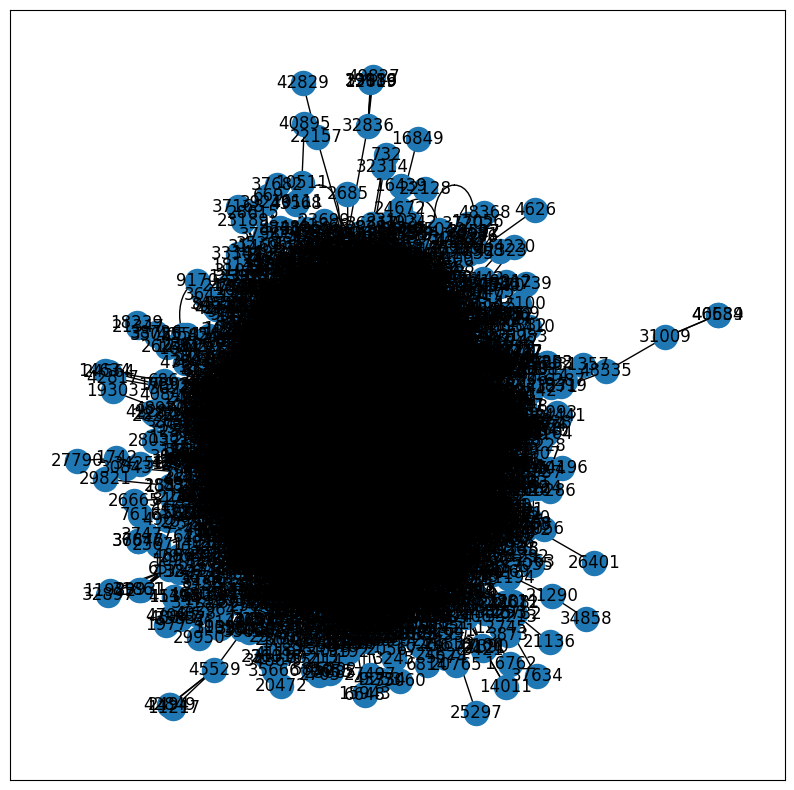

In [21]:
# ler o primeiro ficheiro de interesse - artist_edges
artists_df = pd.read_csv('resources/artist_edges.csv')
artists_G = nx.from_pandas_edgelist(artists_df, 'node_1', 'node_2')
print(artists_G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(artists_G, with_labels=True)
plt.show()

Graph with 7057 nodes and 89455 edges


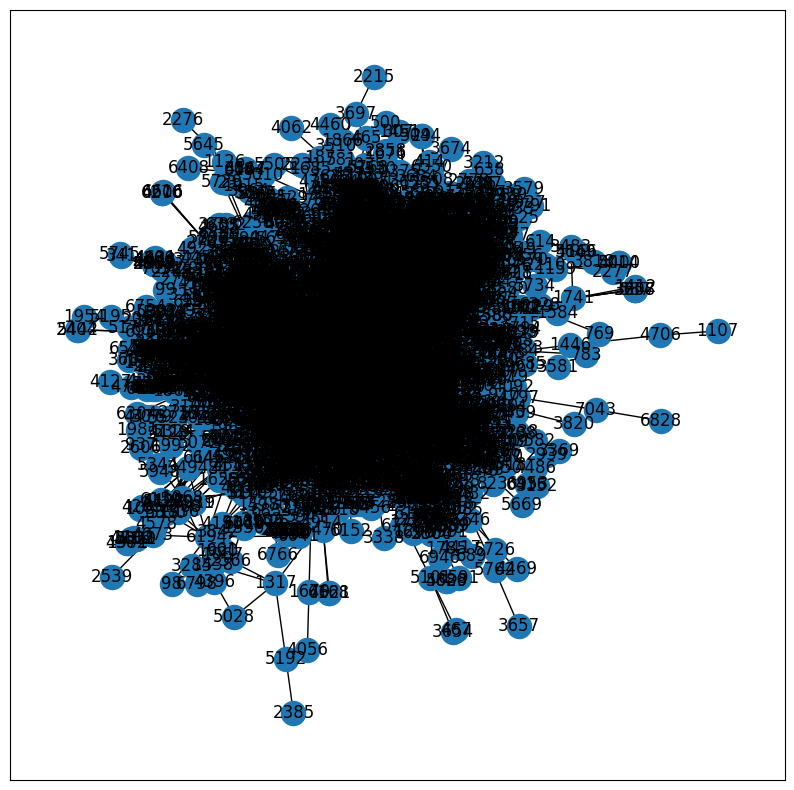

In [22]:
# ler o segundo ficheiro de interesse - government_edges
government_df = pd.read_csv('resources/government_edges.csv')
government_G = nx.from_pandas_edgelist(government_df, 'node_1', 'node_2')
print(government_G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(government_G, with_labels=True)
plt.show()

Graph with 27917 nodes and 206259 edges


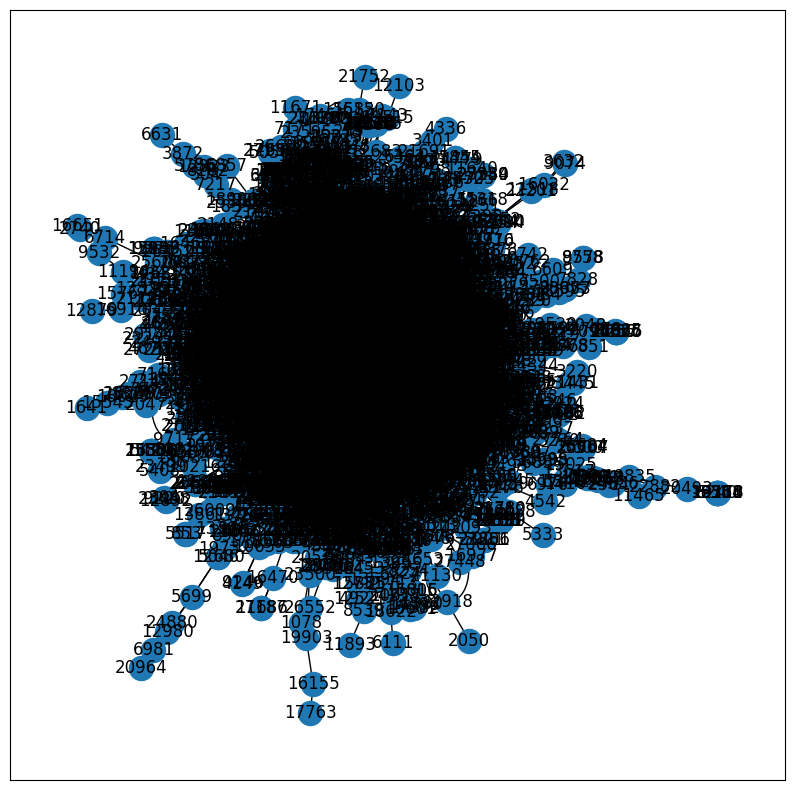

In [23]:
# ler o terceiro ficheiro de interesse - new_sites_edges
new_sites_df = pd.read_csv('resources/new_sites_edges.csv')
new_sites_G = nx.from_pandas_edgelist(new_sites_df, 'node_1', 'node_2')
print(new_sites_G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(new_sites_G, with_labels=True)
plt.show()

Graph with 13866 nodes and 86858 edges


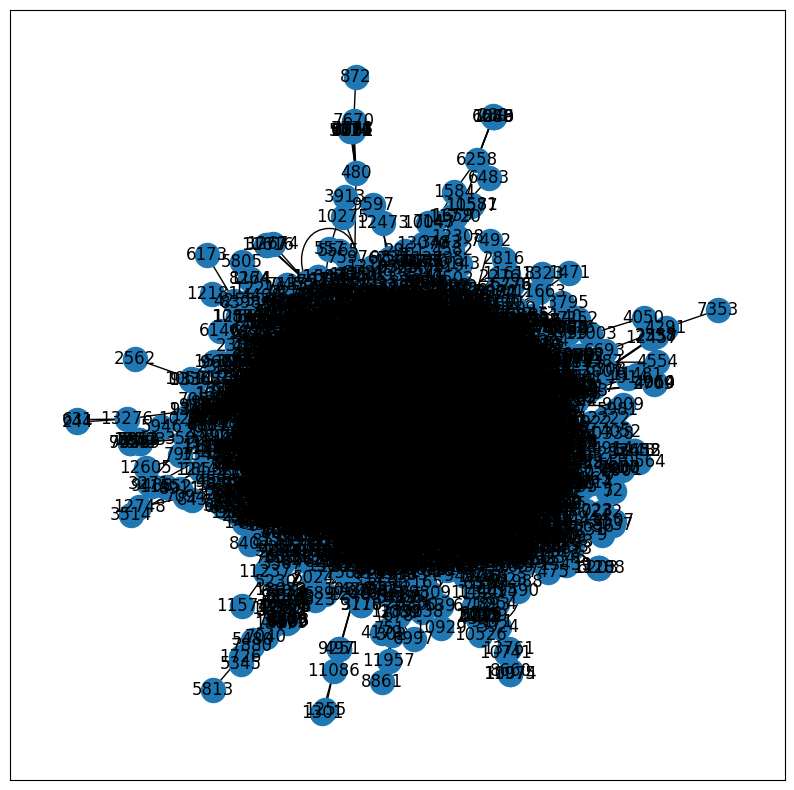

In [24]:
# ler o quarto ficheiro de interesse - athletes_edges
athletes_df = pd.read_csv('resources/athletes_edges.csv')
athletes_G = nx.from_pandas_edgelist(athletes_df, 'node_1', 'node_2')
print(athletes_G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(athletes_G, with_labels=True)
plt.show()

In [8]:
def takeSubset(G, p):
    C = G.copy()
    amount_of_nodes_to_remove = int(len(C.nodes) * (1 - p))
    for i in range(amount_of_nodes_to_remove):
        #re-sort
        nodes_sorted_by_degree = sorted(C.nodes, key=C.degree)
        #nodes = list(G.nodes)
        #nodes_sorted_by_degree = mergeSort(C, nodes, 0, len(nodes) - 1)
        node_to_remove = nodes_sorted_by_degree[0] #get the first <- Lowest degree node
        C.remove_nodes_from([node_to_remove])
    if nx.number_connected_components(C) == 1:
        return C
    else:
        print(nx.number_connected_components(C))
        core = next(nx.connected_components(C))
        print(len(core))
        return core

# Government Subset

Graph with 706 nodes and 22040 edges


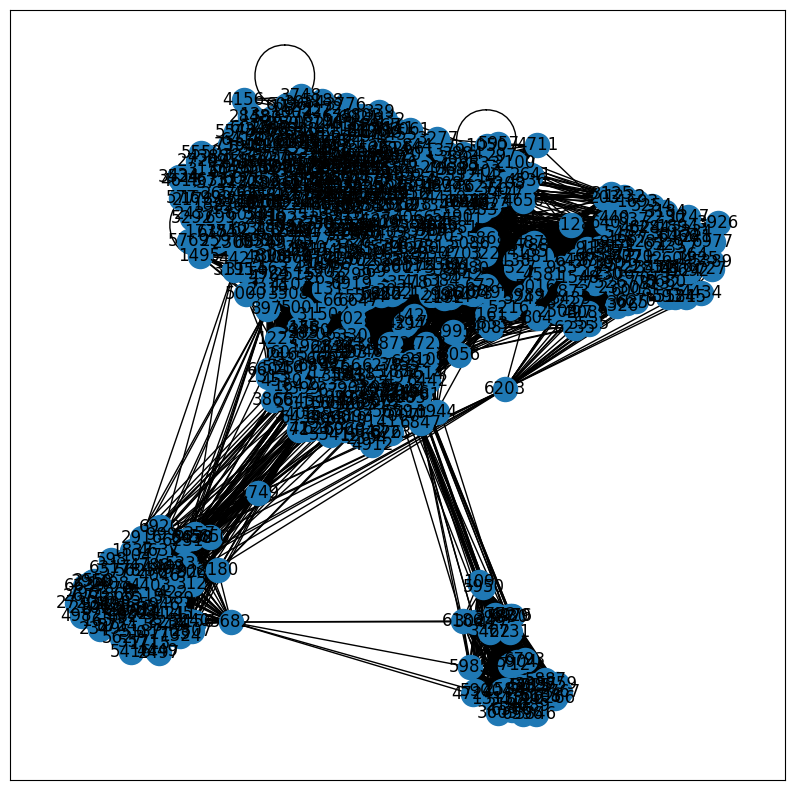

In [10]:
#government_subset_G = takeSubset(government_G, 0.1)
government_subset_G = nx.read_edgelist('resources/subset_government.csv')
print(government_subset_G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(government_subset_G, with_labels=True)
plt.show()

In [ ]:
nx.write_edgelist(government_subset_G, "resources/subset_government.csv")

In [11]:
#Average degree Government Subset
average_degree_government_subset_G = nx.average_degree_connectivity(government_subset_G)
print("Average degree Government Subset --> ", statistics.mean(average_degree_government_subset_G))

Average degree Government Subset -->  108.14285714285714


Comparing with the original government set:

In [12]:
#Average degree Government original set
average_degree_government_set_G = nx.average_degree_connectivity(government_G)
print("Average degree Government Original Set --> ",statistics.mean(average_degree_government_set_G))

Average degree Government Original Set -->  137.0958904109589


Comments: Ao mantermos os nós com grau mais alto, e excluirmos os nós com grau mais baixo, estamos a retirar arestas ao grafo original e, por isso, todos os nós irão perder grau devido à perda de vizinhos. É notável que o valor médio diminua, uma vez que o grau de todos os nós irá ser afetado e diminuir. É ainda possível verificar no gráfico abaixo que o nó com maior grau tem o valor de 307 e o nó com menor grau tem um valor próximo de 20. O que é previsto é que o nó com 307 vizinhos seja o representante do partido com maior número de deputados na assembleia, tendo sido o partido eleito nas últimas eleições e o nó com valor mais baixo representaria um deputado do (possível) 5º partido com maior número de deputados, sendo que é possível identificar pelo menos cinco comunidades no grafo deste subset.

In [13]:
#CC Government Subset
cc_government_subset_G = nx.average_clustering(government_subset_G)
print("Clustering coeff Government Subset --> ", cc_government_subset_G)

Clustering coeff Government Subset -->  0.5000434461434425


In [14]:
#CC Government original set
cc_government_G = nx.average_clustering(government_G)
print("Clustering coeff Government Original Set --> ", cc_government_G)

Clustering coeff Government Original Set -->  0.41088422622445253


Comments:
No subset, foram descartados os nós com grau mais baixo, e o nº de conexões não permaneceu proporcional ao grafo original. Em vez disso, o subconjunto manteve uma estrutura mais "concentrada" no sentido em que, deixamos os nós mais conectados, que têm maior probabilidade de formar agrupamentos. Isto resulta num coeficiente de clustering mais elevado, pois a estrutura do subset favorece a criação de comunidades com maior densidade de conexões entre os nós.

In [ ]:
#Betweenness government subset
betweenness_government_subset_G = nx.centrality.betweenness_centrality(government_subset_G)
highest_betweenness_node_government_subset = max(government_subset_G.nodes, key=betweenness_government_subset_G.get)
print("Highest betweenness node of government subset --> ", highest_betweenness_node_government_subset)
print("Betweenness value --> ", betweenness_government_subset_G[highest_betweenness_node_government_subset])

Highest betweenness node of government subset -->  5320
Valor de Betweenness -->  0.0820371324994462


In [ ]:
#Betweenness government original set
betweenness_government_G = nx.centrality.betweenness_centrality(government_G)
highest_betweenness_node_government = max(government_G.nodes, key=betweenness_government_G.get)
print("Highest betweenness node of government original set --> ", highest_betweenness_node_government)
print("Betweenness value --> ", betweenness_government_G[highest_betweenness_node_government])

Highest betweenness node of government original set -->  5320
Valor de Betweenness -->  0.06317274202874214


Comments: Em ambos os sets, o nó mais "central" é o nó 5320, ou seja, mesmo com um set reduzido, a importância continua neste nó, o que faz sentido, tendo em conta que normalmente o nó com maior Betweenneess é um nó com elevado número de conexões, uma vez que apenas descartamos os nós "menos importantes". O aumento de Betweenneess nesse nó para o subset deve-se ao facto de ao reduzirmos o grafo, o nó 5320 ganhou mais "importância" ao ser o nó que conecta mais comunidades, pois os nós com grau mais baixo, que podiam oferecer/criar outros caminhos, foram descartados.

In [15]:
# government subset diameter
d_government_subset_G = nx.diameter(government_subset_G)
print(d_government_subset_G)

4


In [16]:
# government diameter
d_government_G = nx.diameter(government_G)
print(d_government_G)

10


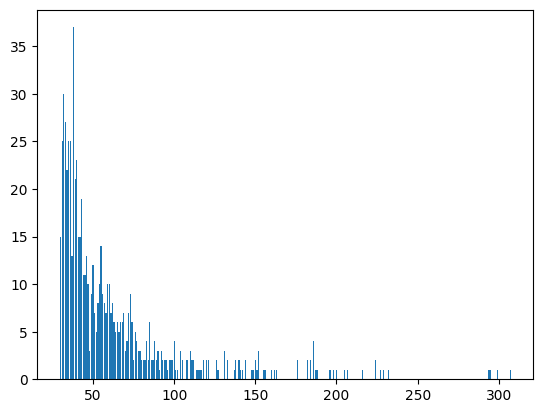

In [ ]:
#Plot bar government subset - degree distribution
list_nodes_gov_subset = [n for n in government_subset_G.nodes]
list_degrees_gov_subset = sorted([government_subset_G.degree(n) for n in list_nodes_gov_subset])
gov_subset_plot_x = range(list_degrees_gov_subset[0], list_degrees_gov_subset[-1] + 1)

gov_subset_plot_y = []
for value in gov_subset_plot_x:
  gov_subset_plot_y.append(list_degrees_gov_subset.count(value))

plt.bar(gov_subset_plot_x, gov_subset_plot_y)
plt.show()

In [ ]:
#Highest degree node gov subset
highest_degree_node_gov_subset = max(government_subset_G.nodes, key=government_subset_G.degree)
print("Highest degree node government subset --> ", highest_degree_node_gov_subset)
print("Node in subset with highest degree --> ", government_subset_G.degree(highest_degree_node_gov_subset))

#Lowest degree node gov subset
lowest_degree_node_gov_subset = min(government_subset_G.nodes, key=government_subset_G.degree)
print("Lowest degree node government subset --> ", lowest_degree_node_gov_subset)
print("Node with lowest degree --> ", government_subset_G.degree(lowest_degree_node_gov_subset))

Highest degree node government subset -->  5320
Node with highest degree -->  307


In [35]:
#Highest degree node gov
highest_degree_node_gov = max([n for n in government_G.nodes], key=government_G.degree)
print("Highest degree node government --> ", highest_degree_node_gov)
print("Node in original with highest degree --> ", government_G.degree(highest_degree_node_gov))

Highest degree node government -->  5320
Node in original with highest degree -->  697


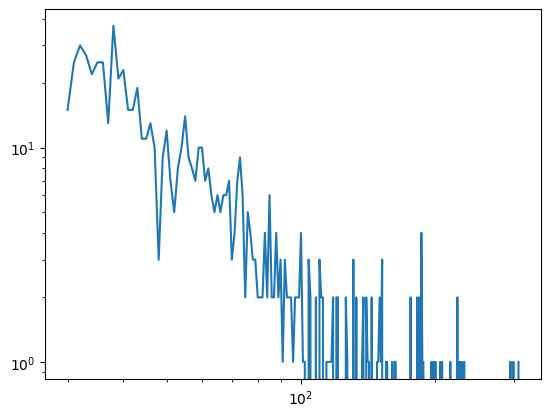

In [ ]:
#Plot bar government - degree distribution (logs)
gov_subset_plot_x_log = range(list_degrees_gov_subset[0], list_degrees_gov_subset[-1] + 1)

gov_subset_plot_y_log = []
for value in gov_subset_plot_x_log:
  gov_subset_plot_y_log.append(list_degrees_gov_subset.count(value))


plt.yscale("log")
plt.xscale("log")
plt.plot(gov_subset_plot_x_log, gov_subset_plot_y_log)
plt.show()

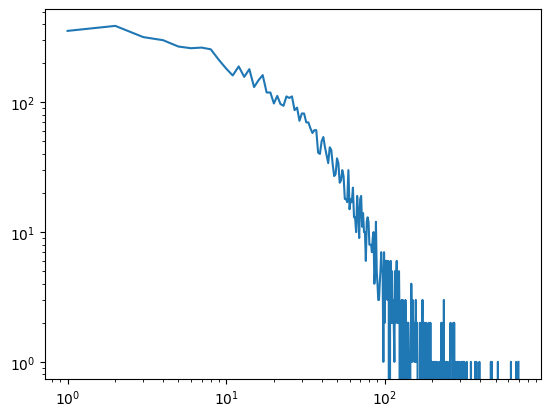

In [36]:
list_nodes_gov = [n for n in government_G.nodes]
list_degrees_gov = sorted([government_G.degree(n) for n in list_nodes_gov])

#Plot bar government - degree distribution (logs)
gov_plot_x_log = range(list_degrees_gov[0], list_degrees_gov[-1] + 1)

gov_plot_y_log = []
for value in gov_plot_x_log:
  gov_plot_y_log.append(list_degrees_gov.count(value))


plt.yscale("log")
plt.xscale("log")
plt.plot(gov_plot_x_log, gov_plot_y_log)
plt.show()

# Artists Subset

Graph with 5052 nodes and 255782 edges


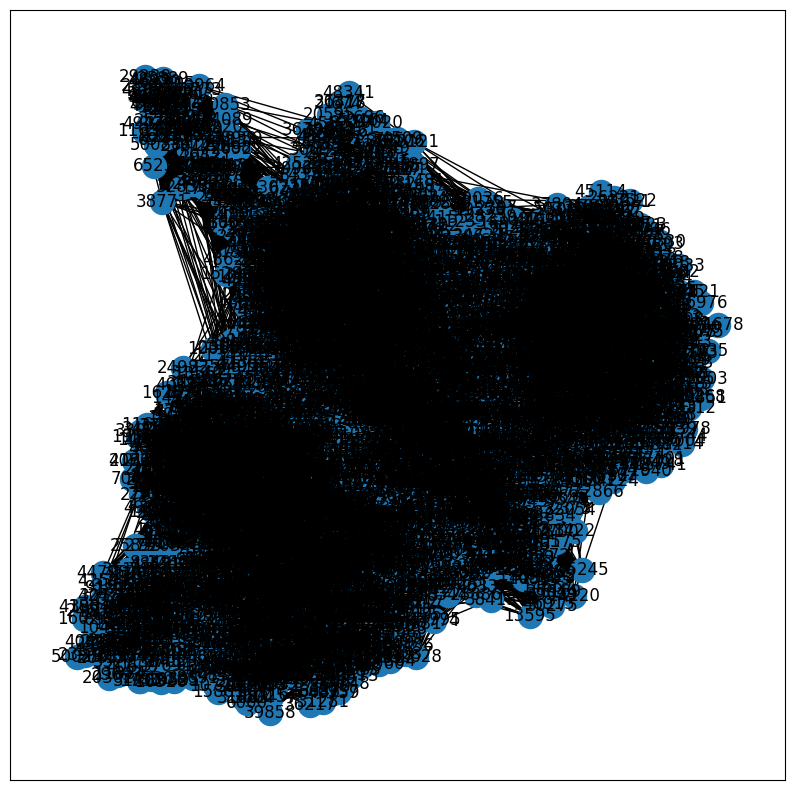

In [19]:
#artists_subset_G = takeSubset(artists_G, 0.1)
artists_subset_G = nx.read_edgelist('resources/subset_artists.csv')
print(artists_subset_G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(artists_subset_G, with_labels=True)
plt.show()

In [ ]:
nx.write_edgelist(artists_subset_G, "subset_artists.csv")

In [25]:
#Average degree Artists Subset
average_degree_artists_subset_G = nx.average_degree_connectivity(artists_subset_G)
print("Average degree Artists Subset --> ", statistics.mean(average_degree_artists_subset_G))

Average degree Artists Subset -->  263.27532467532467


In [ ]:
#Average degree Artists original set
average_degree_artists_set_G = nx.average_degree_connectivity(artists_G)
print("Average degree Artists Original Set --> ",statistics.mean(average_degree_artists_set_G))

Average degree Artists Original Set -->  349.9309153713299


In [ ]:
#CC Artists Subset
cc_artists_subset_G = nx.average_clustering(artists_subset_G)
print("Clustering coeff Artists Subset --> ", cc_artists_subset_G)

Clustering coeff Artists Subset -->  0.14577480628453138


In [ ]:
#CC Artists original set
cc_artists_G = nx.average_clustering(artists_G)
print("Clustering coeff Artists Original Set --> ", cc_artists_G)

Clustering coeff Artists Original Set -->  0.13812042114553588


In [ ]:
#Betweenness artists subset
betweenness_artists_subset_G = nx.centrality.betweenness_centrality(artists_subset_G)
highest_betweenness_node_artists_subset = max(artists_subset_G.nodes, key=betweenness_artists_subset_G.get)
print("Highest betweenness node of artists subset --> ", highest_betweenness_node_artists_subset)
print("Betweenness value --> ", betweenness_artists_subset_G[highest_betweenness_node_artists_subset])

Highest betweenness node of artists subset -->  725
Valor de Betweenness -->  0.01623554392465658


In [26]:
#Betweenness artists original set
betweenness_artists_G = nx.centrality.betweenness_centrality(artists_G)
highest_betweenness_node_artists = max(artists_G.nodes, key=betweenness_artists_G.get)
print("Highest betweenness node of artists original set --> ", highest_betweenness_node_artists)
print("Betweenness value --> ", betweenness_artists_G[highest_betweenness_node_artists])

Highest betweenness node of artists original set -->  48099
Betweenness value -->  0.02694724604292375


In [27]:
# artists subset diameter
d_artists_subset_G = nx.diameter(artists_subset_G)
print(d_artists_subset_G)

4


In [28]:
# artists diameter
d_artists_G = nx.diameter(artists_G)
print(d_artists_G)

11


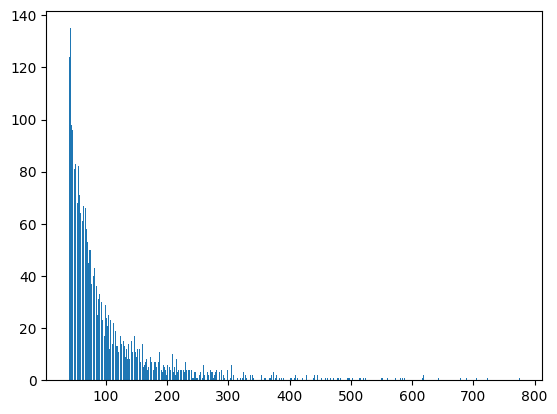

In [29]:
#Plot bar artists subset - degree distribution
list_nodes_artists_subset = [n for n in artists_subset_G.nodes]
list_degrees_artists_subset = sorted([artists_subset_G.degree(n) for n in list_nodes_artists_subset])
artists_subset_plot_x = range(list_degrees_artists_subset[0], list_degrees_artists_subset[-1] + 1)

artists_subset_plot_y = []
for value in artists_subset_plot_x:
  artists_subset_plot_y.append(list_degrees_artists_subset.count(value))

plt.bar(artists_subset_plot_x, artists_subset_plot_y)
plt.show()

In [30]:
#Highest degree node artists subset
highest_degree_node_artists_subset = max(artists_subset_G.nodes, key=artists_subset_G.degree)
print("Highest degree node artists subset --> ", highest_degree_node_artists_subset)
print("Node in subset with highest degree --> ", artists_subset_G.degree(highest_degree_node_artists_subset))

Highest degree node artists subset -->  46851
Node in subset with highest degree -->  775


In [34]:
#Highest degree node artists
highest_degree_node_artists = max(artists_G.nodes, key=artists_G.degree)
print("Highest degree node artists --> ", highest_degree_node_artists)
print("Node in original with highest degree --> ", artists_G.degree(highest_degree_node_artists))

Highest degree node artists -->  7675
Node in original with highest degree -->  1469


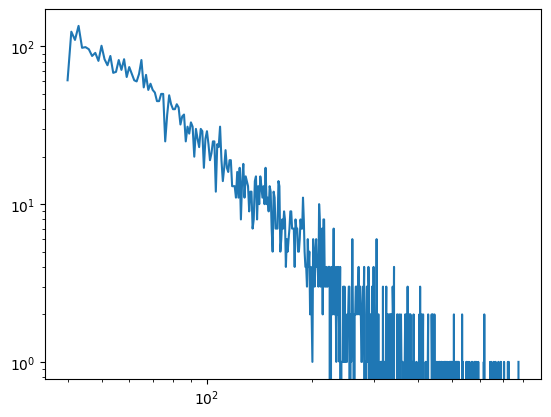

In [31]:
#Plot bar artists subset - degree distribution (logs)
artists_subset_plot_x_log = range(list_degrees_artists_subset[0], list_degrees_artists_subset[-1] + 1)

artists_subset_plot_y_log = []
for value in artists_subset_plot_x_log:
  artists_subset_plot_y_log.append(list_degrees_artists_subset.count(value))


plt.yscale("log")
plt.xscale("log")
plt.plot(artists_subset_plot_x_log, artists_subset_plot_y_log)
plt.show()

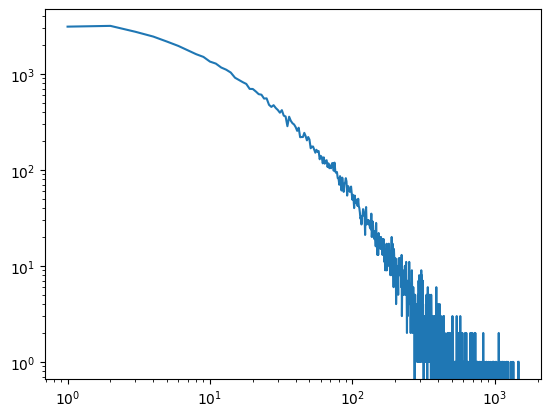

In [32]:
list_nodes_artists = [n for n in artists_G.nodes]
list_degrees_artists = sorted([artists_G.degree(n) for n in list_nodes_artists])

#Plot bar artists - degree distribution (logs)
artists_plot_x_log = range(list_degrees_artists[0], list_degrees_artists[-1] + 1)

artists_plot_y_log = []
for value in artists_plot_x_log:
  artists_plot_y_log.append(list_degrees_artists.count(value))


plt.yscale("log")
plt.xscale("log")
plt.plot(artists_plot_x_log, artists_plot_y_log)
plt.show()

# New sites Subset

Graph with 4188 nodes and 70047 edges


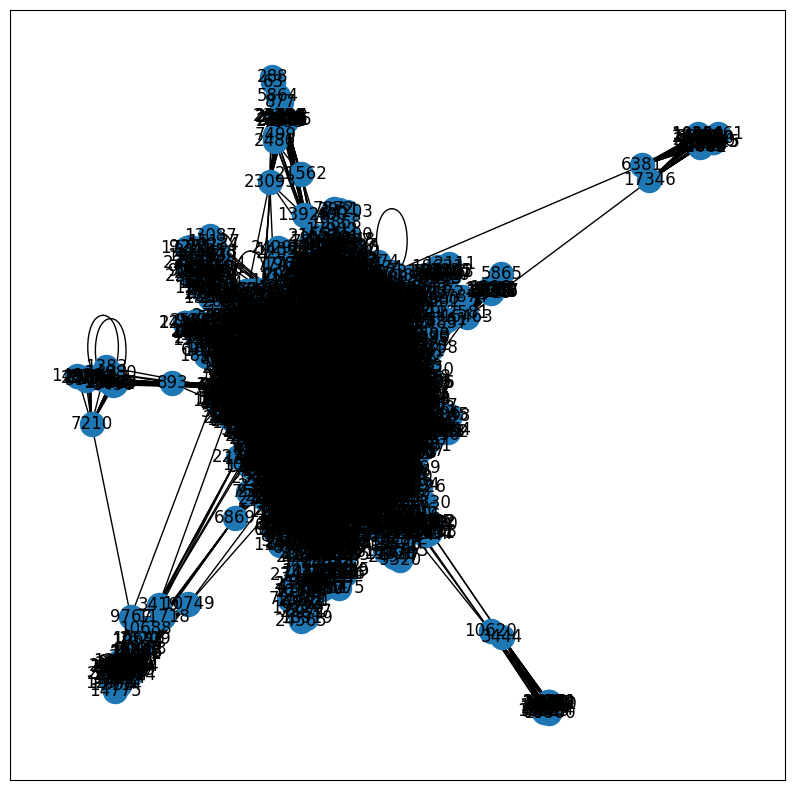

In [37]:
#new_sites_subset_G = takeSubset(new_sites_G, 0.15)
new_sites_subset_G = nx.read_edgelist('resources/subset_newsites.csv')
print(new_sites_subset_G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(new_sites_subset_G, with_labels=True)
plt.show()

In [ ]:
nx.write_edgelist(new_sites_subset_G, "resources/subset_newsites.csv")

In [38]:
#Average degree new sites Subset
average_degree_nsites_subset_G = nx.average_degree_connectivity(new_sites_subset_G)
print("Average degree New sites Subset --> ", statistics.mean(average_degree_nsites_subset_G))

Average degree New sites Subset -->  107.6103896103896


In [39]:
#Average degree New sites original set
average_degree_nsites_set_G = nx.average_degree_connectivity(new_sites_G)
print("Average degree New sites Original Set --> ",statistics.mean(average_degree_nsites_set_G))

Average degree New sites Original Set -->  139.95871559633028


In [40]:
#CC New sites Subset
cc_nsites_subset_G = nx.average_clustering(new_sites_subset_G)
print("Clustering coeff New sites Subset --> ", cc_nsites_subset_G)

Clustering coeff New sites Subset -->  0.31922863427794246


In [41]:
#CC New sites original set
cc_nsites_G = nx.average_clustering(new_sites_G)
print("Clustering coeff New Sites Original Set --> ", cc_nsites_G)

Clustering coeff New Sites Original Set -->  0.295390758182993


In [42]:
#Betweenness new sites subset
betweenness_nsites_subset_G = nx.centrality.betweenness_centrality(new_sites_subset_G)
highest_betweenness_node_nsites_subset = max(new_sites_subset_G.nodes, key=betweenness_nsites_subset_G.get)
print("Highest betweenness node of New Sites subset --> ", highest_betweenness_node_nsites_subset)
print("Betweenness value --> ", betweenness_nsites_subset_G[highest_betweenness_node_nsites_subset])

Highest betweenness node of New Sites subset -->  8978
Betweenness value -->  0.04848833340527244


In [49]:
#Betweenness new sites original set
betweenness_nsites_G = nx.centrality.betweenness_centrality(new_sites_G)
highest_betweenness_node_nsites = max(new_sites_G.nodes, key=betweenness_nsites_G.get)
print("Highest betweenness node of New Sites original set --> ", highest_betweenness_node_nsites)
print("Betweenness value --> ", betweenness_nsites_G[highest_betweenness_node_nsites])

Highest betweenness node of New Sites original set -->  18005
Betweenness value -->  0.043334712519133664


In [43]:
# new sites subset diameter
d_new_sites_subset_G = nx.diameter(new_sites_subset_G)
print(d_new_sites_subset_G)

8


In [50]:
# new sites diameter
d_new_sites_G = nx.diameter(new_sites_G)
print(d_new_sites_G)

15


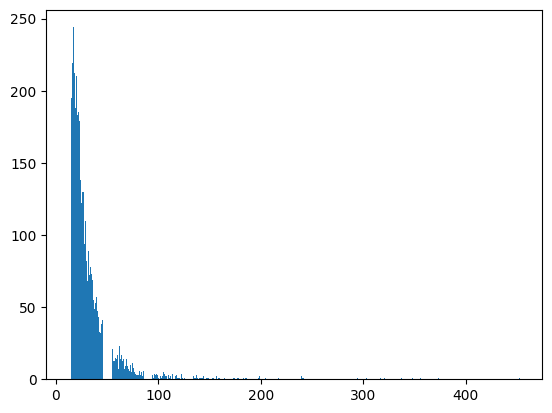

In [44]:
#Plot bar New Sites subset - degree distribution
list_nodes_nsites_subset = [n for n in new_sites_subset_G.nodes]
list_degrees_nsites_subset = sorted([new_sites_subset_G.degree(n) for n in list_nodes_nsites_subset])
nsites_subset_plot_x = range(list_degrees_nsites_subset[0], list_degrees_nsites_subset[-1] + 1)

nsites_subset_plot_y = []
for value in nsites_subset_plot_x:
  nsites_subset_plot_y.append(list_degrees_nsites_subset.count(value))

plt.bar(nsites_subset_plot_x, nsites_subset_plot_y)
plt.show()

In [45]:
#Highest degree node New Sites subset
highest_degree_node_nsites_subset = max(new_sites_subset_G.nodes, key=new_sites_subset_G.degree)
print("Highest degree node New Sites subset --> ", highest_degree_node_nsites_subset)
print("Node with highest degree --> ", new_sites_subset_G.degree(highest_degree_node_nsites_subset))

Highest degree node New Sites subset -->  8978
Node with highest degree -->  452


In [46]:
#Highest degree node New Sites
highest_degree_node_nsites = max(new_sites_G.nodes, key=new_sites_G.degree)
print("Highest degree node New Sites --> ", highest_degree_node_nsites)
print("Node in original with highest degree --> ", new_sites_G.degree(highest_degree_node_nsites))

Highest degree node New Sites -->  8978
Node in original with highest degree -->  678


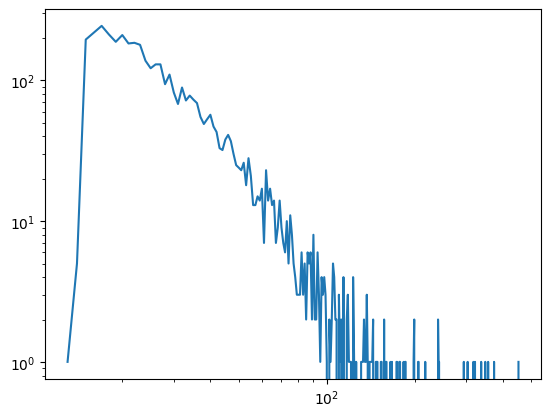

In [47]:
#Plot bar New Sites subset - degree distribution (logs)
nsites_subset_plot_x_log = range(list_degrees_nsites_subset[0], list_degrees_nsites_subset[-1] + 1)

nsites_subset_plot_y_log = []
for value in nsites_subset_plot_x_log:
  nsites_subset_plot_y_log.append(list_degrees_nsites_subset.count(value))


plt.yscale("log")
plt.xscale("log")
plt.plot(nsites_subset_plot_x_log, nsites_subset_plot_y_log)
plt.show()

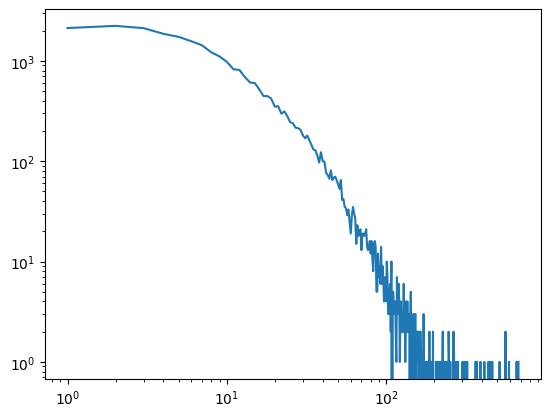

In [48]:
list_nodes_nsites = [n for n in new_sites_G.nodes]
list_degrees_nsites = sorted([new_sites_G.degree(n) for n in list_nodes_nsites])

#Plot bar new sites - degree distribution (logs)
nsites_plot_x_log = range(list_degrees_nsites[0], list_degrees_nsites[-1] + 1)

nsites_plot_y_log = []
for value in nsites_plot_x_log:
  nsites_plot_y_log.append(list_degrees_nsites.count(value))


plt.yscale("log")
plt.xscale("log")
plt.plot(nsites_plot_x_log, nsites_plot_y_log)
plt.show()

# Athletes Subset

Graph with 1387 nodes and 18304 edges


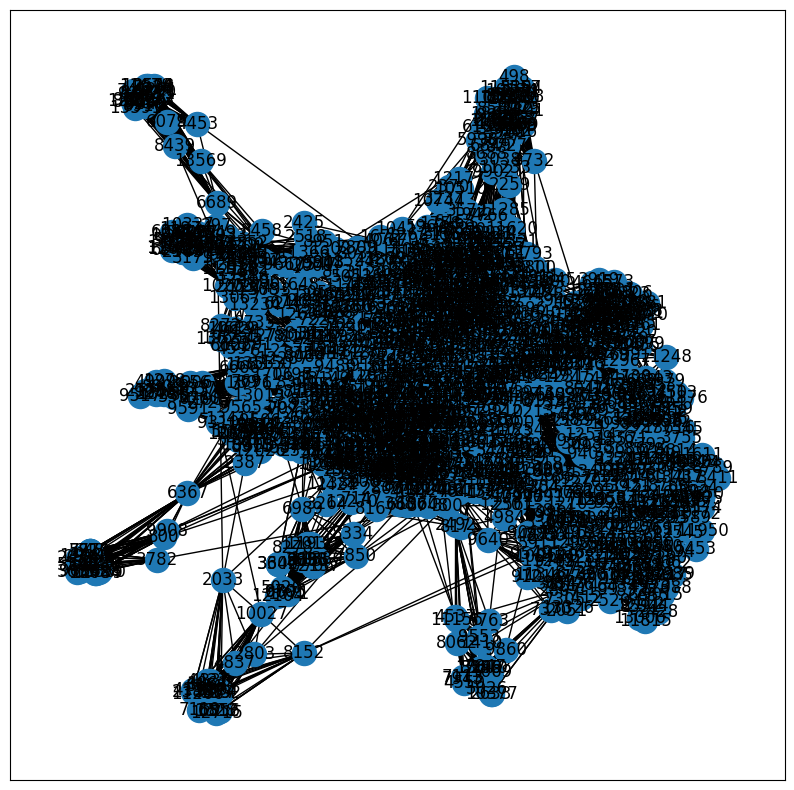

In [52]:
#athletes_subset_G = takeSubset(athletes_G, 0.1)
athletes_subset_G = nx.read_edgelist('resources/subset_athletes.csv')
print(athletes_subset_G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(athletes_subset_G, with_labels=True)
plt.show()

In [ ]:
nx.write_edgelist(athletes_subset_G, "resources/subset_athletes.csv")

In [53]:
#Average degree Athletes Subset
average_degree_athletes_subset_G = nx.average_degree_connectivity(athletes_subset_G)
print("Average degree Athletes Subset --> ", statistics.mean(average_degree_athletes_subset_G))

Average degree Athletes Subset -->  61.8


In [55]:
#Average degree Athletes original set
average_degree_athletes_set_G = nx.average_degree_connectivity(athletes_G)
print("Average degree Athletes Original Set --> ",statistics.mean(average_degree_athletes_set_G))

Average degree Athletes Original Set -->  95.90123456790124


In [56]:
#CC Athletes Subset
cc_athletes_subset_G = nx.average_clustering(athletes_subset_G)
print("Clustering coeff Athletes Subset --> ", cc_athletes_subset_G)

Clustering coeff Athletes Subset -->  0.35768171198087284


In [57]:
#CC Athletes original set
cc_athletes_G = nx.average_clustering(athletes_G)
print("Clustering coeff Athletes Original Set --> ", cc_athletes_G)

Clustering coeff Athletes Original Set -->  0.27618837043394356


In [58]:
#Betweenness Athletes subset
betweenness_athletes_subset_G = nx.centrality.betweenness_centrality(athletes_subset_G)
highest_betweenness_node_athletes_subset = max(athletes_subset_G.nodes, key=betweenness_athletes_subset_G.get)
print("Highest betweenness node of Athletes subset --> ", highest_betweenness_node_athletes_subset)
print("Betweenness value --> ", betweenness_athletes_subset_G[highest_betweenness_node_athletes_subset])

Highest betweenness node of Athletes subset -->  6221
Betweenness value -->  0.0676363339634249


In [59]:
#Betweenness athletes original set
betweenness_athletes_G = nx.centrality.betweenness_centrality(athletes_G)
highest_betweenness_node_athletes = max(athletes_G.nodes, key=betweenness_athletes_G.get)
print("Highest betweenness node of Athletes original set --> ", highest_betweenness_node_athletes)
print("Betweenness value --> ", betweenness_athletes_G[highest_betweenness_node_athletes])

Highest betweenness node of Athletes original set -->  6221
Betweenness value -->  0.056732806563342904


In [60]:
# athletes subset diameter
d_athletes_subset_G = nx.diameter(athletes_subset_G)
print(d_athletes_subset_G)

6


In [61]:
# athletes diameter
d_athletes_G = nx.diameter(athletes_G)
print(d_athletes_G)

11


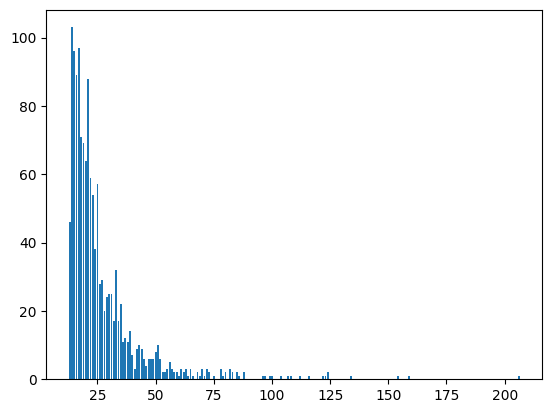

In [62]:
#Plot bar Athletes subset - degree distribution
list_nodes_athletes_subset = [n for n in athletes_subset_G.nodes]
list_degrees_athletes_subset = sorted([athletes_subset_G.degree(n) for n in list_nodes_athletes_subset])
athletes_subset_plot_x = range(list_degrees_athletes_subset[0], list_degrees_athletes_subset[-1] + 1)

athletes_subset_plot_y = []
for value in athletes_subset_plot_x:
  athletes_subset_plot_y.append(list_degrees_athletes_subset.count(value))

plt.bar(athletes_subset_plot_x, athletes_subset_plot_y)
plt.show()

In [63]:
#Highest degree node Athletes subset
highest_degree_node_athletes_subset = max(athletes_subset_G.nodes, key=athletes_subset_G.degree)
print("Highest degree node Athletes subset --> ", highest_degree_node_athletes_subset)
print("Node with highest degree --> ", athletes_subset_G.degree(highest_degree_node_athletes_subset))

Highest degree node Athletes subset -->  6221
Node with highest degree -->  206


In [64]:
#Highest degree node Athletes
highest_degree_node_athletes = max(athletes_G.nodes, key=athletes_G.degree)
print("Highest degree node New Sites --> ", highest_degree_node_athletes)
print("Node in original with highest degree --> ", athletes_G.degree(highest_degree_node_athletes))

Highest degree node New Sites -->  6221
Node in original with highest degree -->  468


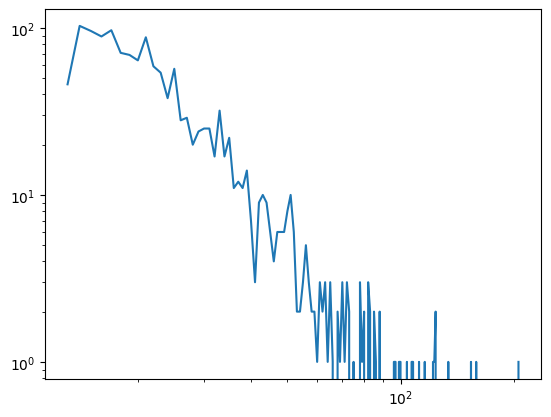

In [65]:
#Plot bar Athletes subset - degree distribution (logs)
athletes_subset_plot_x_log = range(list_degrees_athletes_subset[0], list_degrees_athletes_subset[-1] + 1)

athletes_subset_plot_y_log = []
for value in athletes_subset_plot_x_log:
  athletes_subset_plot_y_log.append(list_degrees_athletes_subset.count(value))


plt.yscale("log")
plt.xscale("log")
plt.plot(athletes_subset_plot_x_log, athletes_subset_plot_y_log)
plt.show()

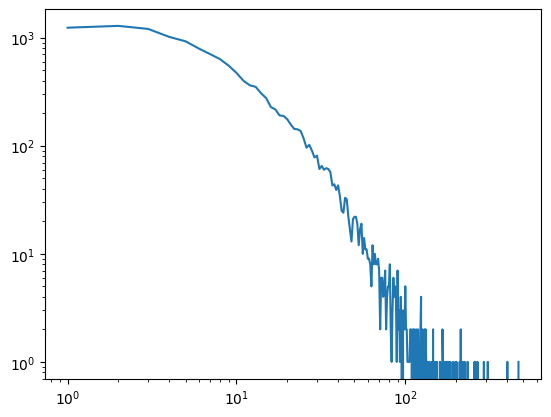

In [66]:
list_nodes_athletes = [n for n in athletes_G.nodes]
list_degrees_athletes = sorted([athletes_G.degree(n) for n in list_nodes_athletes])

#Plot bar athletes - degree distribution (logs)
athletes_plot_x_log = range(list_degrees_athletes[0], list_degrees_athletes[-1] + 1)

athletes_plot_y_log = []
for value in athletes_plot_x_log:
  athletes_plot_y_log.append(list_degrees_athletes.count(value))


plt.yscale("log")
plt.xscale("log")
plt.plot(athletes_plot_x_log, athletes_plot_y_log)
plt.show()

In [27]:
import random
import string

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCDE')
    return state

In [28]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        # Caveat: what if the node has no neighbors?
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

Government

In [ ]:
import matplotlib.pyplot as plt
from resources.simulation import Simulation

government_subset_sim = Simulation(government_subset_G, initial_state, state_transition, name='government subset Voter Model')

In [37]:
government_subset_sim.run(750)

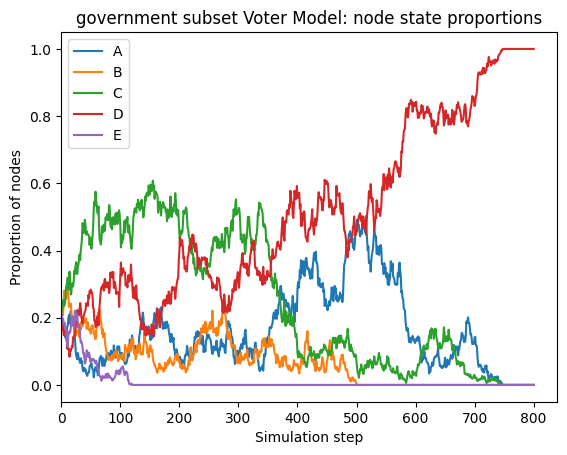

In [38]:
government_subset_sim.plot(labels="ABCDE")
plt.show()

Artists

In [47]:
artists_subset_sim = Simulation(artists_subset_G, initial_state, state_transition, name='artists subset Voter Model')

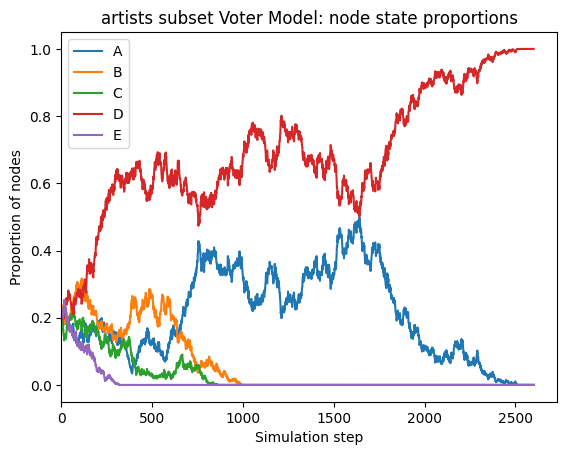

In [60]:
artists_subset_sim.run(2600)
artists_subset_sim.plot(labels="ABCDE")
plt.show()

New Sites

In [48]:
nsites_subset_sim = Simulation(new_sites_subset_G, initial_state, state_transition, name='new sites subset Voter Model')

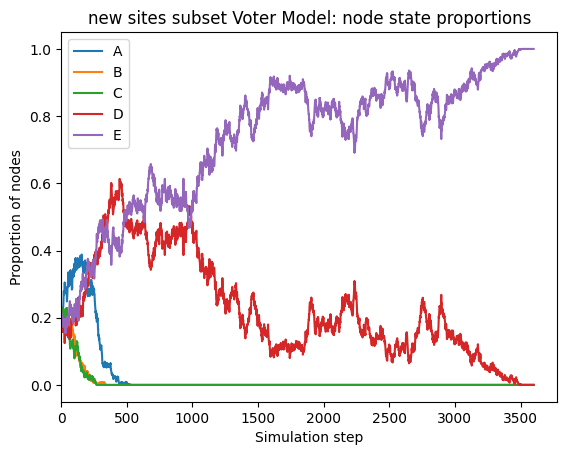

In [63]:
nsites_subset_sim.run(3600)
nsites_subset_sim.plot(labels="ABCDE")
plt.show()

Athletes

In [49]:
athletes_subset_sim = Simulation(athletes_subset_G, initial_state, state_transition, name='athletes subset Voter Model')

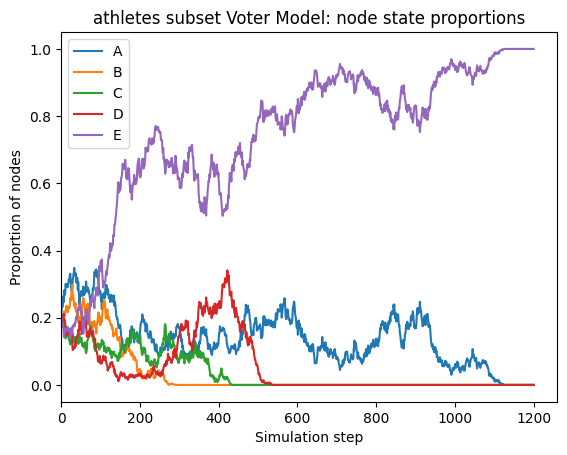

In [55]:
athletes_subset_sim.run(1200)
athletes_subset_sim.plot(labels="ABCDE")
plt.show()